In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
from scipy.io import loadmat
import matplotlib.gridspec as gridspec
%matplotlib inline

In [4]:
data = loadmat('data/ex5data1.mat')

In [28]:
X = data['X']
X_val = data['Xval']
X_test = data['Xtest']

y = data['y']
y_val = data['yval']
y_test = data['ytest']

m = len(X)
m_val = len(X_val)
m_test = len(X_test)

In [29]:
# Add a column of 1's to X
X = np.c_[np.ones(m), X]
X_val = np.c_[np.ones(m_val), X_val]
X_test = np.c_[np.ones(m_test), X_test]

(0, 40)

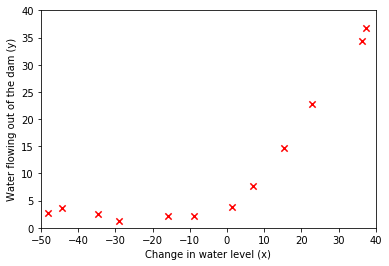

In [33]:
plt.figure()
plt.scatter(X[:, 1:], y, c = 'r', marker = 'x', s = 40)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlim(-50, 40)
plt.ylim(0, 40)

In [175]:
def linear_reg_cost_function(theta, X, y, lam):
    m = y.size
    y = y.ravel()
    J = (1 / (2 * m)) * np.sum((theta.dot(X.T) - y) ** 2) + (lam / (2 * m)) * np.sum(theta[1:] ** 2)
    return J
    

In [176]:
lam = 1
theta_0 = np.ones(X.shape[1])

cost = linear_reg_cost_function(theta_0, X, y, lam)

print('Cost at theta = [1, 1]: %.3f' % cost)
print('(this value should be about 303.993)')

Cost at theta = [1, 1]: 303.993
(this value should be about 303.993)


In [145]:
cost

(303.9931922202643, array([-15.30301567, 598.25074417]))

In [177]:
def linear_reg_cost_function(theta, X, y, lam):
    m = y.size
    y = y.ravel()
#     print('X', X)
#     print('Y', y)
#     print('theta', theta)
    J = (1 / (2 * m)) * np.sum((theta.dot(X.T) - y) ** 2) + (lam / (2 * m)) * np.sum(theta[1:] ** 2)
    grad = (1 / m) * (theta.dot(X.T) - y).dot(X) + lam / m * np.array([0, *theta[1:]])
    return J, grad

In [178]:
lam = 1
theta_0 = np.ones(X.shape[1])

cost, grad = linear_reg_cost_function(theta_0, X, y, lam)

print('Gradient at theta = [1, 1]: [%.6f, %.6f]' % (grad[0], grad[1]))
print('(this value should be about [-15.303016, 598.250744])')

Gradient at theta = [1, 1]: [-15.303016, 598.250744]
(this value should be about [-15.303016, 598.250744])


In [179]:
lam = 0
minimize(linear_reg_cost_function, theta_0, method = None, args = (X, y, lam), jac = True)

      fun: 22.373906495108915
 hess_inv: array([[1.0297299 , 0.00612422],
       [0.00612422, 0.00121324]])
      jac: array([1.48804385e-08, 3.97027004e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([13.08790353,  0.36777923])

In [149]:
theta_0 = np.zeros([X.shape[1], 1])

In [150]:
def train_linear_reg(theta_0, X, y, lam):
    theta = minimize(fun = linear_reg_cost_function, x0 = theta_0, args = (X, y, lam), method = 'CG', jac=True, options = {'maxiter': 200})
    return theta

In [151]:
trained = train_linear_reg(theta_0, X, y, 0)
print(trained.x[0], trained.x[1])

13.087903510869086 0.367779229745651


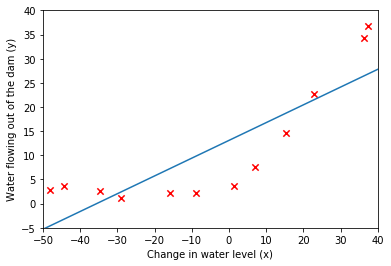

In [180]:
x_pts = np.linspace(-50, 40, 2)

plt.figure()
plt.scatter(X[:, 1:], y, c = 'r', marker = 'x', s = 40)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlim(-50, 40)
plt.ylim(-5, 40)
plt.plot([-50, 40], [-1*trained.x[1]*50 + trained.x[0], trained.x[1]*40 + trained.x[0]])

In [153]:
lam = 0
theta_0 = np.array([1., 1.])

In [158]:
def learning_curve(theta_0, X, y, X_val, y_val, m, lam):
    error_train, error_val = np.zeros(m - 1), np.zeros(m - 1)
    for i in range(2, m + 1):
        res_train = train_linear_reg(theta_0, X[:, :i], y, lam)
        theta = res_train['x']
        error_train[i - 2], error_val[i - 2] = linear_reg_cost_function(theta, X[:, :i], y, 0)[0], linear_reg_cost_function(theta, X_val, y_val, 0)[0]
    return error_train, error_val

In [182]:
def learning_curve(theta_0, X, y, Xval, yval, _lambda):
    m_train = X.shape[0]
    m_val = Xval.shape[0]
    error_train = np.zeros(m_train)
    error_val = np.zeros(m_train)
    for i in range(m_train):
        data_set = X[0:i+1, :]
        labels = y[0:i+1, :]
        t = train_linear_reg(theta_0, data_set, labels, _lambda)
        theta_trained = t.x.reshape(X.shape[1], 1)
        h_train = np.dot(data_set, theta_trained)
        h_val = np.dot(Xval, theta_trained)
        error_train[i] = np.sum(np.square(h_train - labels)) / (2*(i+1))
        error_val[i] = np.sum(np.square(h_val - yval)) / (2*m_val)
    return (error_train, error_val)

In [183]:
error_train, error_val = learning_curve(theta_0, X, y, X_val, y_val,lam)

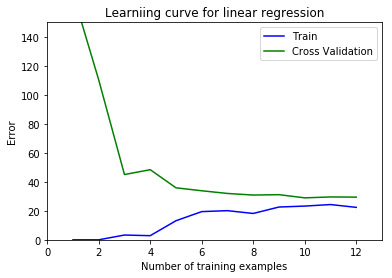

In [184]:
a = np.arange(1, error_train.size + 1)
plt.plot(a, error_train, '-b', label = 'Train')
plt.plot(a, error_val, '-g', label = 'Cross Validation')
plt.axis([0, 13, 0, 150])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.title('Learniing curve for linear regression')
plt.show()

In [195]:
def poly_features(X, p):
    x_1 = X[1]
    for i in range(2, p + 1):
        X = np.vstack((X, x_1 ** i))
    return X

In [196]:
def feature_normalize(X):
    X_poly = np.zeros_like(X)
    X_poly[0] = X[0]
    mu = np.mean(X[1:], 1)
    sigma = np.std(X[1:], 1)
    for i, feature in enumerate(X[1:]):
        feature = (feature - mu[i]) / sigma[i]
        X_poly[i + 1] = feature
    return X_poly, mu, sigma
        

In [201]:
np.size(X[1:])

22

In [197]:
def val_or_test_feature_normalize(X, mu, sigma):
    X_poly = np.zeros_like(X)
    X_poly[0] = X[0]
    for i, feature in enumerate(X[1:]):
        feature = (feature - mu[i]) / sigma[i]
        X_poly[i + 1] = feature
    return X_poly, mu, sigma

In [203]:
poly_deg = 8
X_poly, mu, sigma = feature_normalize(poly_features(X, poly_deg))
# X_poly_val = val_or_test_feature_normalize(poly_features(X_val, 8), mu, sigma)
# X_poly_test = val_or_test_feature_normalize(poly_features(X_test, 8), mu, sigma)

In [209]:
sigma

array([1.50764896e+01, 1.75947743e+01, 1.82460937e+01, 2.45294147e+01,
       4.97072897e+00, 7.15389644e+00, 1.78531329e+01, 1.94577184e-01,
       2.26918799e+01, 3.00675104e+00, 1.08813745e+01, 4.24448099e+02,
       1.23890031e+04, 3.61161273e+05, 1.05289422e+07, 3.06950017e+08,
       8.94850748e+09, 2.60875653e+11])